In [74]:
import os
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import pdb
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import interfaces, matutils, utils
import re
from datetime import date
import matplotlib.dates as mdates
import dateutil.parser
import string
import dateutil
from matplotlib.dates import DateFormatter
import numpy as np

In [75]:
sps = set(stopwords.words('english'))
file = open("atire_puurula.txt")
for line in file:
    sps.add(line.strip())
file = open("my_stops.txt")
for line in file:
    sps.add(line.strip())
file = open("names.txt")
for line in file:
    sps.add(line.strip())

map(sps.add, ["from", "sent", "to", "subject", ])

In [76]:
punctre = re.compile('[%s]' % re.escape(string.punctuation))
def process(email):
    i = 0
    mydate = 0
    while not email[i].startswith("X-FileName"):
        if email[i].startswith("Date"):
            mydate = dateutil.parser.parse(email[i][5:])
        i += 1
    email = ' '.join(email[i+1:])
    nopunct = punctre.sub('',email)
    tokens = [token for token in utils.tokenize(nopunct,lower=True,errors='ignore') if 2<=len(token)<=15]
    tokens = [token for token in tokens if not token in sps]
    return mydate, tokens
    

In [61]:
print(process(open('./enron_data/maildir/reitmeyer-j/inbox/1.').readlines()))
dateline = open('./enron_data/maildir/reitmeyer-j/inbox/1.').readlines()[1]
print(dateutil.parser.parse(dateline[5:]))

(datetime.datetime(2001, 10, 29, 19, 6, 37, tzinfo=tzoffset('PST', -28800)), 'esource lexisnexis training basic lexisnexis basic geared novice prospective user learn basics nexiscom talk news company lexisnexis attend lexisnexis basics clinic pm eb diligence session focus specific company public records sources lexisnexis aspects companys business strengths liabilities attend lexisnexis diligence clinic pm eb seats fast reserve seat cost person noshows charged bring lexisnexis login password guest esource free lexisnexis online training placeware interactive web learning tool participate training session basics lexisnexis basic geared novice prospective user learn basics nexiscom news company lexisnexis attend lexisnexis basics online clinic central standard rsvp email instructions placeware note scheduled convenient zone schedule sessions esource dow jones interactive training introduction dow jones interactive dji custom clips learn tailor dji display helpful learn create personal ne

In [80]:
root_dir = "./enron_data/maildir"
i = 0
for folder in os.listdir(root_dir):
    for subfold in os.listdir('/'.join([root_dir, folder])):
        for filename in os.listdir('/'.join([root_dir, folder, subfold])):
            date, email = process(open('/'.join([root_dir,folder,subfold,filename])).readlines())
            i+= 1

IsADirectoryError: [Errno 21] Is a directory: './enron_data/maildir/arora-h/inbox/hist_vols'

In [ ]:
dates = []
data = []
problems = []
i = 0
full_text = []
for dirpath, dirnames, filenames in os.walk(root_dir):
    if i > 100:
        break
    for filename in filenames:
        print(i)
        try:
            file = open('/'.join([dirpath, filename])).readlines()
            full_text.append(file)
            date, tokens = process(file)
            dates.append(date)
            data.append(tokens)
            i+=1
        except:
            problems.append('/'.join([dirpath, filename]))
            print(problems[-1])
        

In [84]:
file = open("tokenized_enron.dat", "w")
for line in data:
    file.write(' '.join(line) + "\n")

In [86]:
file = open("tokenized_enron_dates.dat", "w")
for line in dates:
    file.write(line.isoformat() + "\n")

In [91]:
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

In [2]:
data = []
dates = []
file = open("tokenized_enron.dat")
for x in file:
    data.append(x.split(' '))
file = open("tokenized_enron_dates.dat")
for x in file:
    dates.append(dateutil.parser.parse(x))

In [3]:
combo = list(zip(data, dates))
np.random.shuffle(combo)
ssData, ssDates = list(zip(*combo[:20000]))
ssData = list(ssData)
ssDates = list(ssDates)
ssDictionary = corpora.Dictionary(ssData)
ssCorpus = [ssDictionary.doc2bow(text) for text in ssData]

In [4]:
ssLDA = gensim.models.ldamodel.LdaModel(ssCorpus, num_topics=30, id2word = ssDictionary, passes=20)

In [5]:
perplex = ssLDA.bound(ssCorpus)

In [6]:
np.exp2(-perplex / sum(cnt for document in list(ssCorpus) for _, cnt in document))

379.94205769390675

In [7]:
def create_word_cloud(lda):
    for t in range(lda.num_topics):
        plt.figure()
        plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 200))))
        plt.axis("off")
        plt.title("Topic #" + str(t))
        plt.show()

In [8]:
a = [1,2,3,4,5]
b = [5,4,3,2,1]
ab = list(zip(a,b))

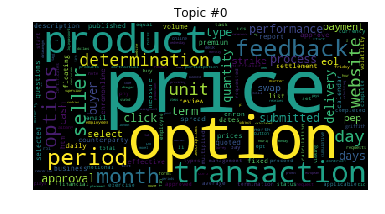

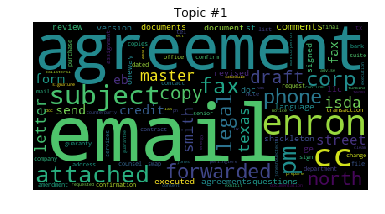

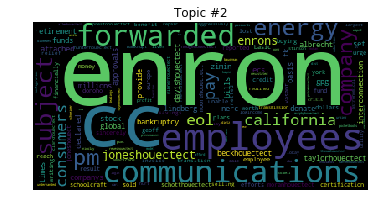

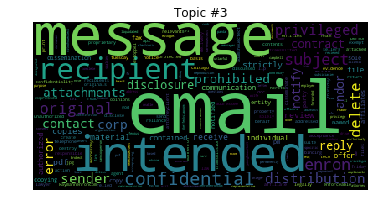

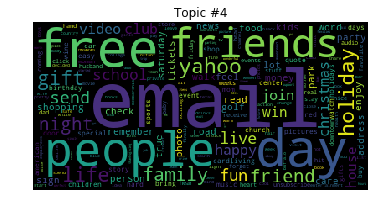

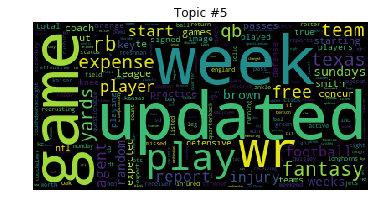

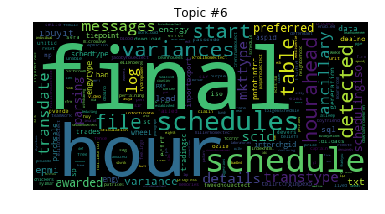

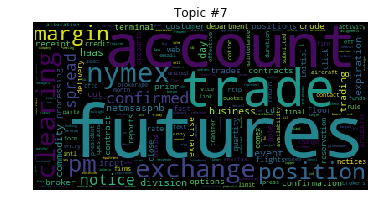

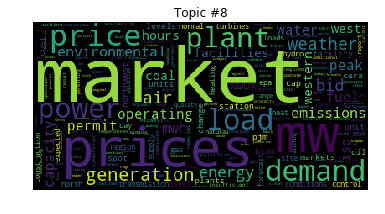

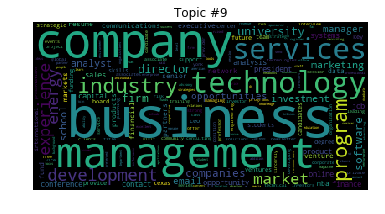

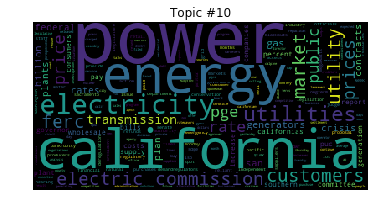

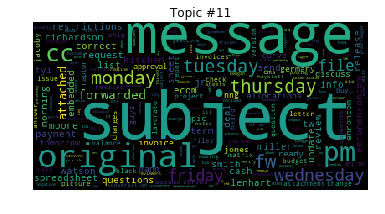

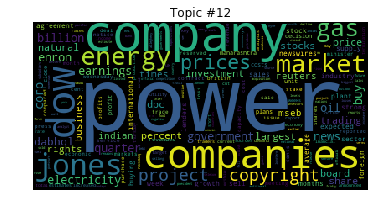

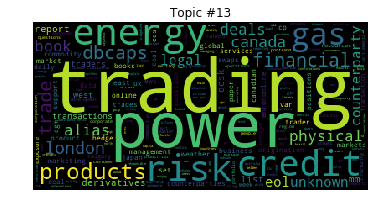

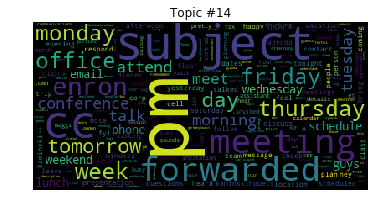

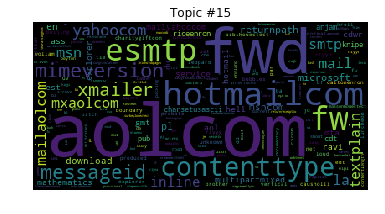

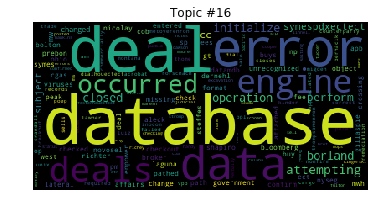

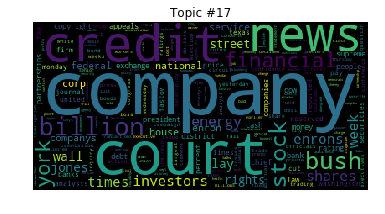

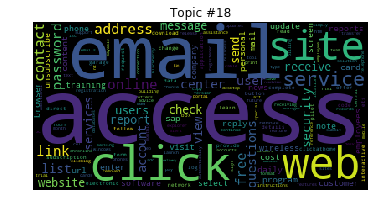

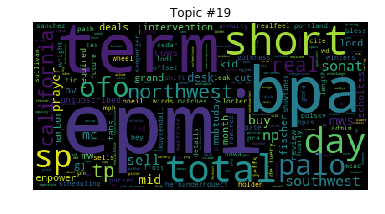

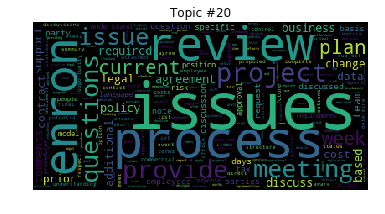

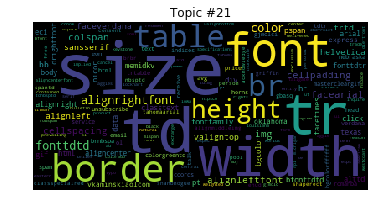

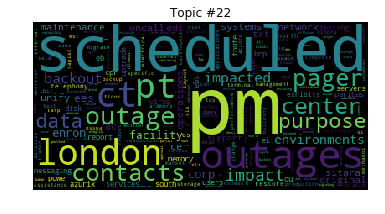

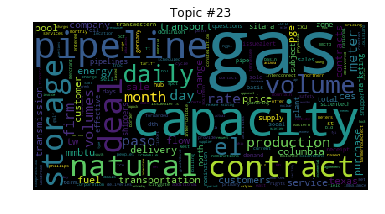

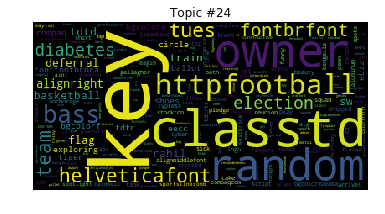

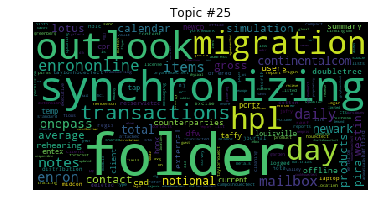

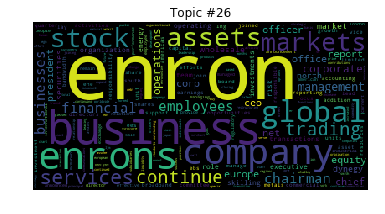

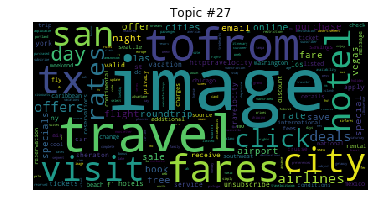

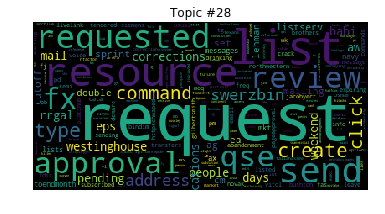

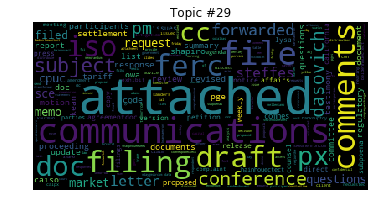

In [9]:
create_word_cloud(ssLDA)

In [10]:
import gensim

In [13]:
model = gensim.models.KeyedVectors.load_word2vec_format('./review/GoogleNews-vectors-negative300.bin', binary=True)  

In [14]:
model.most_similar("boy")

[('girl', 0.8543272018432617),
 ('teenager', 0.7606690526008606),
 ('toddler', 0.7043969631195068),
 ('teenage_girl', 0.6851483583450317),
 ('man', 0.6824870109558105),
 ('teen_ager', 0.6499968767166138),
 ('son', 0.6337764263153076),
 ('kid', 0.63228440284729),
 ('youngster', 0.618381679058075),
 ('stepfather', 0.5989423394203186)]

In [15]:
ssLDA.show_topic(10,10)

[('power', 0.034519885),
 ('california', 0.023351172),
 ('energy', 0.023032608),
 ('electricity', 0.012340657),
 ('utilities', 0.010861884),
 ('market', 0.007644414),
 ('electric', 0.007487079),
 ('commission', 0.007143282),
 ('utility', 0.006813534),
 ('ferc', 0.0068134936)]

In [40]:
def get_title(topic, n):
    weight_avg = np.zeros((300,), dtype='f')
    weight_total = 0
    for x in topic:
        if x[0] in model:
            weight_avg += model[x[0]] * x[1]
            weight_total += x[1]
    weight_avg /= weight_total
    weight_avg = np.array(weight_avg)
    return model.most_similar(positive=[weight_avg], negative=[], topn=n)

In [46]:
for x in range(ssLDA.num_topics):
    print("Topic", x)
    print(get_title(ssLDA.show_topic(x,50),3))

Topic 0
[('price', 0.7044481039047241), ('HCA_refiles', 0.6312963962554932), ('bellow_#,####_resistance', 0.6222975850105286)]
Topic 1
[('sisports@intrstar.net', 0.7051213979721069), ('By_Christina_Stymfal', 0.7032970190048218), ('aingersoll@gfherald.com', 0.6992617249488831)]
Topic 2
[('By_Joseph_Woelfel', 0.6812766790390015), ('By_Tejas_Gunas', 0.6747720241546631), ("FAN_'S_ATTIC", 0.6718235611915588)]
Topic 3
[('aingersoll@gfherald.com', 0.7107599377632141), ('rantsandraves@jacksonville.com', 0.7009052038192749), ('wnelson@gfherald.com', 0.6977668404579163)]
Topic 4
[("Sorry_ma'am", 0.6588671207427979), ('SeekingAffluent.com', 0.6511517763137817), ('leannrimes_@', 0.6374598741531372)]
Topic 5
[('Jerramy_Stevens_TE', 0.6764724254608154), ('wonÃ_¢_â', 0.6727328300476074), ('game', 0.6647441387176514)]
Topic 6
[('schedules', 0.6678512096405029), ('schedule', 0.6438250541687012), ('please_visit_foxreality.com', 0.6242355108261108)]
Topic 7
[('futures', 0.6746457815170288), ('Premarket_D

### for x in range(ssLDA.num_topics):
    print("Topic", x)
    print(get_title(ssLDA.show_topic(x,20),1))

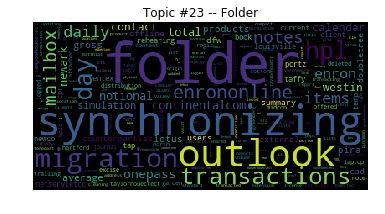

In [59]:
plt.imshow(WordCloud().fit_words(dict(ssLDA.show_topic(25, 200))))
plt.axis("off")
plt.title("Topic #23 -- Folder")
plt.show()

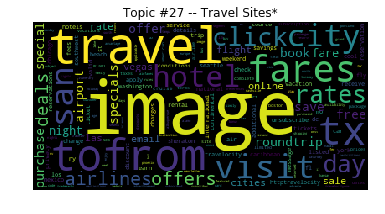

In [65]:
plt.imshow(WordCloud().fit_words(dict(ssLDA.show_topic(27, 200))))
plt.axis("off")
plt.title("Topic #27 -- Travel Sites*")
plt.show()

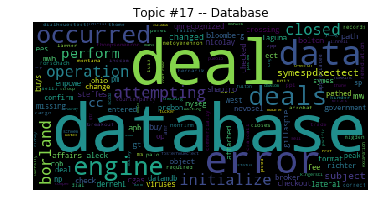

In [54]:
plt.imshow(WordCloud().fit_words(dict(ssLDA.show_topic(27, 200))))
plt.axis("off")
plt.title("Topic #17 -- Database")
plt.show()

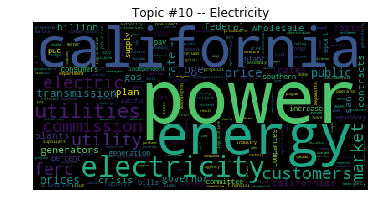

In [56]:
plt.imshow(WordCloud().fit_words(dict(ssLDA.show_topic(10, 200))))
plt.axis("off")
plt.title("Topic #10 -- Electricity")
plt.show()

In [63]:
model.most_similar(positive=["outlook", "email"], negative=["word"], topn=1)

[('forecasts', 0.44607609510421753)]

In [ ]:
for x in range(len(data)):
    tempDict = ssDictionary.doc2bow(data[x]) 
    topics = ssLDA[tempDict]
    for y in topics:
        if y[0] == 23 and y[1] > 0.5:
            pdb.set_trace()

In [70]:
ssLDA[ssCorpus[0]]

[(1, 0.013688657),
 (5, 0.10632763),
 (9, 0.2765292),
 (10, 0.07977531),
 (13, 0.05466969),
 (14, 0.11128238),
 (20, 0.33669922)]